In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset

df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape, df.columns

((9994, 21),
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
       dtype='object'))

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Select Relevant Columns

df = df[[
    "Order ID", "Order Date", "Region", "Category", "Sub-Category",
    "Sales", "Profit", "Discount", "Quantity"
]]

df.head()

,Order ID,Order Date,Region,Category,Sub-Category,Sales,Profit,Discount,Quantity
0,CA-2016-152156,11/8/2016,South,Furniture,Bookcases,261.9600,41.9136,0.00,2
1,CA-2016-152156,11/8/2016,South,Furniture,Chairs,731.9400,219.5820,0.00,3
2,CA-2016-138688,6/12/2016,West,Office Supplies,Labels,14.6200,6.8714,0.00,2
3,US-2015-108966,10/11/2015,South,Furniture,Tables,957.5775,-383.0310,0.45,5
4,US-2015-108966,10/11/2015,South,Office Supplies,Storage,22.3680,2.5164,0.20,2


In [7]:
# Rename columns

df.columns = [
    "order_id", "order_date", "region", "category", "sub_category",
    "sales", "profit", "discount", "quantity"
]

df.head()

,order_id,order_date,region,category,sub_category,sales,profit,discount,quantity
0,CA-2016-152156,11/8/2016,South,Furniture,Bookcases,261.9600,41.9136,0.00,2
1,CA-2016-152156,11/8/2016,South,Furniture,Chairs,731.9400,219.5820,0.00,3
2,CA-2016-138688,6/12/2016,West,Office Supplies,Labels,14.6200,6.8714,0.00,2
3,US-2015-108966,10/11/2015,South,Furniture,Tables,957.5775,-383.0310,0.45,5
4,US-2015-108966,10/11/2015,South,Office Supplies,Storage,22.3680,2.5164,0.20,2


In [8]:
# convert date column
df["order_date"] = pd.to_datetime(df["order_date"])

In [9]:
# Feature Engineering

# Profit Margin
df["profit_margin"] = df["profit"] / df["sales"]

# Extract year and month
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month

df.head()

,order_id,order_date,region,category,sub_category,sales,profit,discount,quantity,profit_margin,order_year,order_month
0,CA-2016-152156,2016-11-08,South,Furniture,Bookcases,261.9600,41.9136,0.00,2,0.1600,2016,11
1,CA-2016-152156,2016-11-08,South,Furniture,Chairs,731.9400,219.5820,0.00,3,0.3000,2016,11
2,CA-2016-138688,2016-06-12,West,Office Supplies,Labels,14.6200,6.8714,0.00,2,0.4700,2016,6
3,US-2015-108966,2015-10-11,South,Furniture,Tables,957.5775,-383.0310,0.45,5,-0.4000,2015,10
4,US-2015-108966,2015-10-11,South,Office Supplies,Storage,22.3680,2.5164,0.20,2,0.1125,2015,10


In [10]:
# KPI Overview

total_sales = df["sales"].sum()
total_profit = df["profit"].sum()
avg_margin = df["profit_margin"].mean()

total_sales, total_profit, avg_margin

(np.float64(2297200.8603000003),
 np.float64(286397.0217),
 np.float64(0.12031392972104459))

In [11]:
# Sales vs Profit by Category

category_perf = df.groupby("category")[["sales", "profit"]].sum().sort_values("sales", ascending=False)
category_perf

,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [12]:
# Region-wise KPI Tradeoff

region_perf = df.groupby("region")[["sales", "profit"]].sum()
region_perf["profit_margin"] = region_perf["profit"] / region_perf["sales"]
region_perf.sort_values("sales", ascending=False)

,sales,profit,profit_margin
region,,,
West,725457.8245,108418.4489,0.149448
East,678781.2400,91522.7800,0.134834
Central,501239.8908,39706.3625,0.079216
South,391721.9050,46749.4303,0.119343


In [13]:
# Discount vs Profit

discount_perf = df.groupby("discount")[["sales", "profit"]].mean()
discount_perf

,sales,profit
discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


In [14]:
# Monthly Revenue vs Profit Trend

monthly_trend = df.groupby(["order_year", "order_month"])[["sales", "profit"]].sum().reset_index()
monthly_trend.head()

,order_year,order_month,sales,profit
0,2014,1,14236.895,2450.1907
1,2014,2,4519.892,862.3084
2,2014,3,55691.009,498.7299
3,2014,4,28295.345,3488.8352
4,2014,5,23648.287,2738.7096


<Figure size 800x400 with 0 Axes>

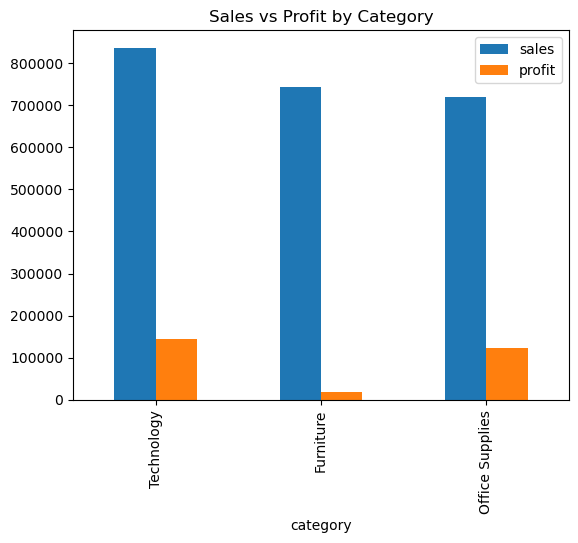

In [15]:
# Visualization (Sales vs Profit)
plt.figure(figsize=(8,4))
category_perf[["sales","profit"]].plot(kind="bar")
plt.title("Sales vs Profit by Category")
plt.show()

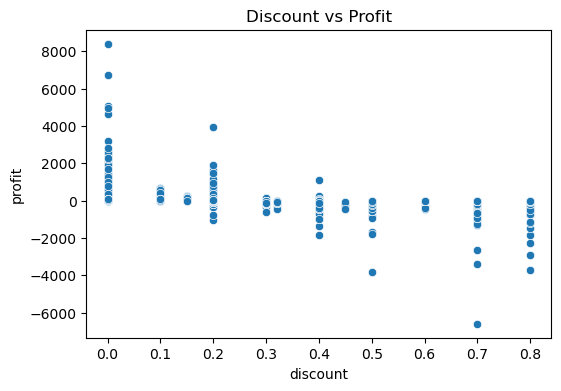

In [16]:
# Visualization (Discount vs Profit)

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="discount", y="profit")
plt.title("Discount vs Profit")
plt.show()

In [17]:
print("INSIGHT:")
print("Some categories and regions generate high sales but low or negative profit.")
print("Discount-driven revenue growth can mislead overall performance evaluation.")

INSIGHT:
Some categories and regions generate high sales but low or negative profit.
Discount-driven revenue growth can mislead overall performance evaluation.


In [19]:
df.to_csv("cleaned_superstore.csv", index=False)